In [1]:
import warnings
warnings.filterwarnings('ignore')

from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

b
global news_df

def News():
    global keyword, num, news_df, url,page_num
    
    keyword = input('검색 키워드를 입력해주세요')
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    num = int(input('필요한 뉴스기사의 숫자를 입력해주세요'))
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser')
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

News()


검색 키워드를 입력해주세요AI
필요한 뉴스기사의 숫자를 입력해주세요1000


,title,url
0,"김영환 지사, 과기장관에 AI영재고 설립 지원 등 건의",https://www.yna.co.kr/view/AKR2022080810650006...
1,"KT·서울성모병원, 당뇨 관리 돕는 AI 기술 개발",https://biz.chosun.com/it-science/ict/2022/08/...
2,삼성전자 ‘AI 챌린지’,https://www.chosun.com/economy/tech_it/2022/08...
3,"삼성전자, AI인재 키워 반도체·디스플레이 연구한다",https://zdnet.co.kr/view/?no=20220807083406
4,'2022 스마트농업 AI 경진대회' 개최,http://www.aflnews.co.kr/news/articleView.html...
...,...,...
995,"충남, AI 학습용 '종패 생산 데이터' 구축한다",http://www.joongdo.co.kr/web/view.php?key=2022...
996,AI 활용해 고위험 수입식품 스마트하게 찾는다,https://mdtoday.co.kr/news/view/1065571221308528
997,"화성시, AI자원회수기기 설치 시범운영",http://www.nspna.com/news/?mode=view&newsid=58...
998,"혁신성장 정책금융, AI 분야 공급액 5년새 45배 증가",https://view.asiae.co.kr/article/2022080309350...


In [2]:
news_df[news_df['title'].duplicated() == True] 
news_df=news_df.drop_duplicates(subset=['title'])
news_df.describe()

,title,url
count,795,795
unique,795,795
top,"김영환 지사, 과기장관에 AI영재고 설립 지원 등 건의",https://www.yna.co.kr/view/AKR2022080810650006...
freq,1,1


In [3]:
news_df[news_df['title'].duplicated() == True] #688중복

,title,url


In [4]:
news_df

,title,url
0,"김영환 지사, 과기장관에 AI영재고 설립 지원 등 건의",https://www.yna.co.kr/view/AKR2022080810650006...
1,"KT·서울성모병원, 당뇨 관리 돕는 AI 기술 개발",https://biz.chosun.com/it-science/ict/2022/08/...
2,삼성전자 ‘AI 챌린지’,https://www.chosun.com/economy/tech_it/2022/08...
3,"삼성전자, AI인재 키워 반도체·디스플레이 연구한다",https://zdnet.co.kr/view/?no=20220807083406
4,'2022 스마트농업 AI 경진대회' 개최,http://www.aflnews.co.kr/news/articleView.html...
...,...,...
994,"하나은행, 은행권 최초 모바일 앱 하나원큐 내 'AI뱅커' 도입",http://news.tf.co.kr/read/economy/1954765.htm
995,"충남, AI 학습용 '종패 생산 데이터' 구축한다",http://www.joongdo.co.kr/web/view.php?key=2022...
996,AI 활용해 고위험 수입식품 스마트하게 찾는다,https://mdtoday.co.kr/news/view/1065571221308528
997,"화성시, AI자원회수기기 설치 시범운영",http://www.nspna.com/news/?mode=view&newsid=58...


In [22]:
import requests as req
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}

li = []
for i in news_df.url:
    url = i
    html = req.get(url, headers = headers)
    bs = BeautifulSoup(html.text,'lxml')
    texts = bs.find_all('p')
    for text in texts:
        t = text.get_text()
        li.append(t)
li

['재난포털',
 '기사제보',
 '자동완성 기능이 켜져 있습니다.',
 '송고시간2022-08-08 15:07',
 ' (청주=연합뉴스) 박재천 기자 = 김영환 충북지사는 8일 세종에서 이종호 과학기술정보통신부 장관을 만나 지역 주요 현안에 대한 관심과 지원을 요청했다.',
 ' 김 지사는 충북의 성장 발판이 될 사업이라며 한국과학기술원(KAIST) 오송 바이오메디컬 캠퍼스타운 조성, 인공지능(AI) 영재고 설립, 오창 방사광가속기 적기 구축 및 최첨단 연구인프라 구축, 충청권 공동 인공지능·메타버스 기반 재난안전관리 등에 대한 전폭적인 지원을 건의했다.',
 '[충북도 제공. 재판매 및 DB 금지] ',
 '',
 ' 김 지사는 "대한민국 바이오 발전을 견인하는 충북이 한 단계 더 발전하기 위해 의과학 교육시설인 카이스트 캠퍼스타운 조성이 필요하고, 현 정부의 반도체 인력양성 기조에 부합하는 카이스트 부설 AI 영재고도 필수 불가결한 사업"이라고 강조했다.',
 ' 이 장관은 "충북은 바이오, 반도체, 이차전지 산업의 중심으로 대한민국 첨단산업의 미래를 견인하고 있다고 생각하며 충북 발전을 위해 건의 사업에 대해 긍정적으로 검토하겠다"고 말했다.',
 ' jcpark@yna.co.kr',
 '\n제보는 카카오톡 okjebo\n<저작권자(c) 연합뉴스,\n무단 전재-재배포 금지>\n2022/08/08 15:07 송고\n',
 '(C) Yonhapnews[대표이사] 성기홍[편집인] 조채희',
 "'삼성 AI 챌린지'…신소재·컴퓨터 부문 국내 대학생에게 멘토링",
 '반도체ㆍ디스플레이입력 :2022/08/07 11:00',
 '삼성전자가 인공지능(AI) 분야 우수 인력을 발굴해 반도체·디스플레이를 연구하기로 했다.',
 '삼성전자는 다음 달 16일까지 대학생 경진대회 ‘삼성 AI 챌린지’를 개최한다고 7일 밝혔다.',
 '공모 과제는 AI 기술을 활용한 신소재 연구와 컴퓨터 비전이다.',
 '신소재 연구 주제는 ‘유기분자 구조로부터 재편성 에너지를 예측하는 알고

In [ ]:
import re


In [20]:
url = news_df.loc[5, 'url']
url

'http://www.edaily.co.kr/news/newspath.asp?newsid=02296006632425352'

In [21]:
html = req.get(url, headers = headers)
bs = BeautifulSoup(html.text,'lxml')
texts = bs.find_all('p')
for text in texts:
    t = text.get_text()
    li.append(t)
li

['재난포털',
 '기사제보',
 '자동완성 기능이 켜져 있습니다.',
 '송고시간2022-08-08 15:07',
 ' (청주=연합뉴스) 박재천 기자 = 김영환 충북지사는 8일 세종에서 이종호 과학기술정보통신부 장관을 만나 지역 주요 현안에 대한 관심과 지원을 요청했다.',
 ' 김 지사는 충북의 성장 발판이 될 사업이라며 한국과학기술원(KAIST) 오송 바이오메디컬 캠퍼스타운 조성, 인공지능(AI) 영재고 설립, 오창 방사광가속기 적기 구축 및 최첨단 연구인프라 구축, 충청권 공동 인공지능·메타버스 기반 재난안전관리 등에 대한 전폭적인 지원을 건의했다.',
 '[충북도 제공. 재판매 및 DB 금지] ',
 '',
 ' 김 지사는 "대한민국 바이오 발전을 견인하는 충북이 한 단계 더 발전하기 위해 의과학 교육시설인 카이스트 캠퍼스타운 조성이 필요하고, 현 정부의 반도체 인력양성 기조에 부합하는 카이스트 부설 AI 영재고도 필수 불가결한 사업"이라고 강조했다.',
 ' 이 장관은 "충북은 바이오, 반도체, 이차전지 산업의 중심으로 대한민국 첨단산업의 미래를 견인하고 있다고 생각하며 충북 발전을 위해 건의 사업에 대해 긍정적으로 검토하겠다"고 말했다.',
 ' jcpark@yna.co.kr',
 '\n제보는 카카오톡 okjebo\n<저작권자(c) 연합뉴스,\n무단 전재-재배포 금지>\n2022/08/08 15:07 송고\n',
 '(C) Yonhapnews[대표이사] 성기홍[편집인] 조채희',
 "'삼성 AI 챌린지'…신소재·컴퓨터 부문 국내 대학생에게 멘토링",
 '반도체ㆍ디스플레이입력 :2022/08/07 11:00',
 '삼성전자가 인공지능(AI) 분야 우수 인력을 발굴해 반도체·디스플레이를 연구하기로 했다.',
 '삼성전자는 다음 달 16일까지 대학생 경진대회 ‘삼성 AI 챌린지’를 개최한다고 7일 밝혔다.',
 '공모 과제는 AI 기술을 활용한 신소재 연구와 컴퓨터 비전이다.',
 '신소재 연구 주제는 ‘유기분자 구조로부터 재편성 에너지를 예측하는 알고

In [28]:
import re
text = ' '.join(li) #list들을 공백으로 구분해서 연결
text1 = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체
text1

'재난포털 기사제보 자동완성 기능이 켜져 있습니다 송고시간 청주 연합뉴스 박재천 기자 김영환 충북지사는 일 세종에서 이종호 과학기술정보통신부 장관을 만나 지역 주요 현안에 대한 관심과 지원을 요청했다 김 지사는 충북의 성장 발판이 될 사업이라며 한국과학기술원 오송 바이오메디컬 캠퍼스타운 조성 인공지능 영재고 설립 오창 방사광가속기 적기 구축 및 최첨단 연구인프라 구축 충청권 공동 인공지능 메타버스 기반 재난안전관리 등에 대한 전폭적인 지원을 건의했다 충북도 제공 재판매 및 금지 김 지사는 대한민국 바이오 발전을 견인하는 충북이 한 단계 더 발전하기 위해 의과학 교육시설인 카이스트 캠퍼스타운 조성이 필요하고 현 정부의 반도체 인력양성 기조에 부합하는 카이스트 부설 영재고도 필수 불가결한 사업 이라고 강조했다 이 장관은 충북은 바이오 반도체 이차전지 산업의 중심으로 대한민국 첨단산업의 미래를 견인하고 있다고 생각하며 충북 발전을 위해 건의 사업에 대해 긍정적으로 검토하겠다 고 말했다 제보는 카카오톡 저작권자 연합뉴스 무단 전재 재배포 금지 송고 대표이사 성기홍 편집인 조채희 삼성 챌린지 신소재 컴퓨터 부문 국내 대학생에게 멘토링 반도체 디스플레이입력 삼성전자가 인공지능 분야 우수 인력을 발굴해 반도체 디스플레이를 연구하기로 했다 삼성전자는 다음 달 일까지 대학생 경진대회 삼성 챌린지 를 개최한다고 일 밝혔다 공모 과제는 기술을 활용한 신소재 연구와 컴퓨터 비전이다 신소재 연구 주제는 유기분자 구조로부터 재편성 에너지를 예측하는 알고리즘 개발 이다 유기 디스플레이 소재 발광 효율에 영향을 주는 것으로 알려진 분자 구조 변화 에너지를 예측하는 모델을 개발해야 한다 삼성전자는 효율이 높고 수명이 긴 유기 디스플레이 발광 소재를 찾는데 드는 시간과 비용이 줄어들 것으로 기대했다 컴퓨터 비전 부문은 전자현미경 이미지로 깊이를 예측하는 알고리즘을 개발해야 한다 차원 전자 현미경 영상에서 반도체 차원 구조 깊이를 계측하고 반도체 공정에서 활용할 수 있는 알고리즘을 찾아야 한다

In [29]:
#konlpy(콘엘피) = 형태소 분석 전
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text1) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list=[]
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
#         if word not in stop_word:
        noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기

# 2022
data_bf =dict(count.most_common(30)) #빈도수 정리 내림차
series = pd.Series(data_bf)
df1_bf=pd.DataFrame(series, columns=['cnt'])
df1_bf

,cnt
기술,1892
서울,1532
서비스,1453
지능,1206
인공,1123
데이터,999
금융,987
통해,939
기업,933
활용,918


In [33]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word = ['AI', '인공', '지능', '기술', '서울', '개발', '활용', '기자', '제공', '통해', '데이터', '한국', '회사', '제공', '단계', '서비스']
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기

# 2022
data_af =dict(count.most_common(30)) #빈도수 정리 내림차
series = pd.Series(data_af)
df_af=pd.DataFrame(series, columns=['cnt'])
df_af

,cnt
금융,986
기업,933
분야,911
반도체,852
산업,703
교육,701
이용,673
위해,672
관련,669
사업,665


(-0.5, 1499.5, 999.5, -0.5)

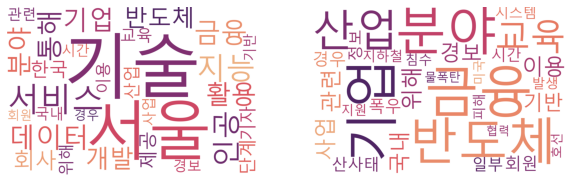

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data_bf)
plt.imshow(wordcloud)
plt.axis('off')

plt.subplot(1,2,2)
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data_af)
plt.imshow(wordcloud)
plt.axis('off')